In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import SpectralSynthesis as ss
import FractalVariates as fv
from tqdm import tqdm

In [28]:
Noise = False
Type = 'Testing'

In [29]:
H_min = 0.0
H_max = 1.0

sigma_min = 0.0
sigma_max = 3.0

pop_max = 50
pop_min = 500

N_p = 100
E = 2

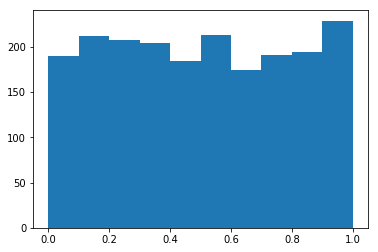

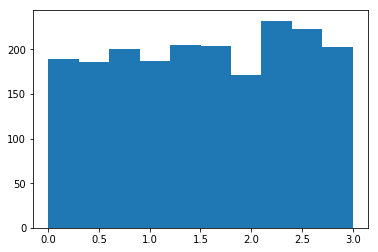

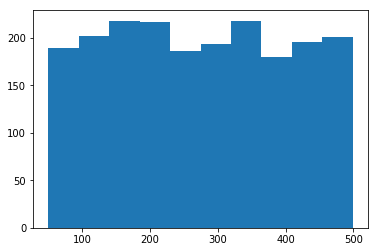

In [30]:
if Type == 'Training':
    N = 20000
elif Type == 'Testing':
    N = 2000
else:
    print('Error')

H_list = (H_max-H_min)*np.random.random(N)+H_min
sigma_list = (sigma_max-sigma_min)*np.random.random(N)+sigma_min
pop_list = (pop_max-pop_min)*np.random.random(N)+pop_min

pop_list = pop_list.astype(int)

plt.figure()
plt.hist(H_list,bins = 10)
plt.show()

plt.figure()
plt.hist(sigma_list,bins = 10)
plt.show()

plt.figure()
plt.hist(pop_list,bins = 10)
plt.show()

In [31]:
if Noise:
    noise_pct_list = np.random.random(N)*0.05

    plt.figure()
    plt.hist(noise_pct_list,bins = 10)
    plt.show()

In [32]:
for i in tqdm(range(N)):
    field = ss.fBm(E=E,exp=True,H=H_list[i],sigma = sigma_list[i],N=N_p)
    
    star_positions = fv.variates(field, pop_list[i])
    
    cv_image = np.zeros((N_p*2,N_p*2,3), np.uint8)
    for position in star_positions:
        cv2.circle(cv_image, (int(position[0]*2), int(position[1]*2)), 1, (0,255,0), -1)
    cv2.imwrite('../Data/FractalClusters/'+Type+'/features/field_'+format(i,'06d')+'.png', cv_image)  


  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)

 32%|█████████████████████████                                                      | 634/2000 [00:07<00:15, 86.69it/s]


 65%|██████████████████████████████████████████████████▊                           | 1302/2000 [00:14<00:08, 87.17it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:22<00:00, 89.11it/s]

In [33]:
labels = np.zeros((N,3))

labels[:,0] = H_list
labels[:,1] = sigma_list
labels[:,2] = pop_list

np.savetxt('../Data/FractalClusters/{}/labels/labels.txt'.format(Type), labels)